In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [2]:

def amortization_table(interest_rate, years, payments_year, principal, addl_principal=0, start_date=datetime.date.today()):

# Ensure the additional payments are negative
    if addl_principal > 0:
        addl_principal = -addl_principal
    
    # Create an index of the payment dates
    rng = pd.date_range(start_date, periods=years * payments_year, freq='MS')
    rng.name = "Payment_Date"
    
    # Build up the Amortization schedule as a DataFrame
    df = pd.DataFrame(index=rng,columns=['Payment', 'Principal', 'Interest', 
                                         'Addl_Principal', 'Curr_Balance'], dtype='float')
    
    # Add index by period (start at 1 not 0)
    df.reset_index(inplace=True)
    df.index += 1
    df.index.name = "Period"
    
    # Calculate the payment, principal and interests amounts using built in Numpy functions
    per_payment = np.pmt(interest_rate/payments_year, years*payments_year, principal)
    df["Payment"] = per_payment
    df["Principal"] = np.ppmt(interest_rate/payments_year, df.index, years*payments_year, principal)
    df["Interest"] = np.ipmt(interest_rate/payments_year, df.index, years*payments_year, principal)
    
    # Round the values
    df = df.round(2) 
    
    # Add in the additional principal payments
    df["Addl_Principal"] = addl_principal
    
    # Store the Cumulative Principal Payments and ensure it never gets larger than the original principal
    df["Cumulative_Principal"] = (df["Principal"] + df["Addl_Principal"]).cumsum()
    df["Cumulative_Principal"] = df["Cumulative_Principal"].clip(lower=-principal)
    
    # Calculate the current balance for each period
    df["Curr_Balance"] = principal + df["Cumulative_Principal"]
    
    # Determine the last payment date
    try:
        last_payment = df.query("Curr_Balance <= 0")["Curr_Balance"].idxmax(axis=1, skipna=True)
    except ValueError:
        last_payment = df.last_valid_index()
    
    last_payment_date = "{:%m-%d-%Y}".format(df.loc[last_payment, "Payment_Date"])

    # Truncate the data frame if we have additional principal payments:
    if addl_principal != 0:
    
        # Remove the extra payment periods
        df = df.ix[0:last_payment].copy()
    
        # Calculate the principal for the last row
        df.ix[last_payment, "Principal"] = -(df.ix[last_payment-1, "Curr_Balance"])
    
        # Calculate the total payment for the last row
        df.ix[last_payment, "Payment"] = df.ix[last_payment, ["Principal", "Interest"]].sum()
    
        # Zero out the additional principal
        df.ix[last_payment, "Addl_Principal"] = 0
    
    # Get the payment info into a DataFrame in column order
    payment_info = (df[["Payment", "Principal", "Addl_Principal", "Interest"]]
                    .sum().to_frame().T)
    
    # Format the Date DataFrame
    payment_details = pd.DataFrame.from_items([('payoff_date', [last_payment_date]),
                                               ('Interest Rate', [interest_rate]),
                                               ('Number of years', [years])
                                              ])
    # Add a column showing how much we pay each period.
    # Combine addl principal with principal for total payment
    payment_details["Period_Payment"] = round(per_payment, 2) + addl_principal
    
    payment_summary = pd.concat([payment_details, payment_info], axis=1)
    return df, payment_summary

df, payment_summary = amortization_table(3.79,52,12,700000,0)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:70: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.


In [3]:
payment_summary

,payoff_date,Interest Rate,Number of years,Period_Payment,Payment,Principal,Addl_Principal,Interest
0,05-01-2030,3.79,52,-221083.33,-1.379560e+08,-1.102660e+64,0.0,1.102660e+64


In [5]:
df

,Payment_Date,Payment,Principal,Interest,Addl_Principal,Curr_Balance,Cumulative_Principal
Period,,,,,,,
1,2019-02-01,-221083.33,-0.000000e+00,-2.210833e+05,0,700000.0,0.0
2,2019-03-01,-221083.33,-0.000000e+00,-2.210833e+05,0,700000.0,0.0
3,2019-04-01,-221083.33,-0.000000e+00,-2.210833e+05,0,700000.0,0.0
4,2019-05-01,-221083.33,-0.000000e+00,-2.210833e+05,0,700000.0,0.0
5,2019-06-01,-221083.33,-0.000000e+00,-2.210833e+05,0,700000.0,0.0
6,2019-07-01,-221083.33,-0.000000e+00,-2.210833e+05,0,700000.0,0.0
7,2019-08-01,-221083.33,-0.000000e+00,-2.210833e+05,0,700000.0,0.0
8,2019-09-01,-221083.33,-0.000000e+00,-2.210833e+05,0,700000.0,0.0
9,2019-10-01,-221083.33,-0.000000e+00,-2.210833e+05,0,700000.0,0.0


Text(0.5,1,'Pay Off Timelines')

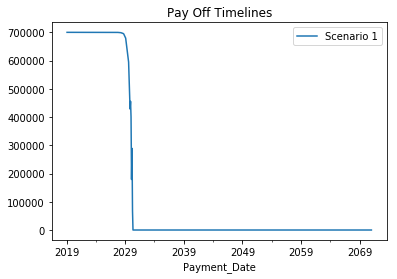

In [4]:
fig, ax = plt.subplots(1, 1)
df.plot(x='Payment_Date', y='Curr_Balance', label="Scenario 1", ax=ax)
#schedule2.plot(x='Payment_Date', y='Curr_Balance', label="Scenario 2", ax=ax)
#schedule3.plot(x='Payment_Date', y='Curr_Balance', label="Scenario 3", ax=ax)
plt.title("Pay Off Timelines")

In [6]:
500000 * .04

20000.0

In [8]:
650000 *.2

130000.0

In [ ]:
130,000